In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ntick
import matplotlib.pyplot as plt
%matplotlib inline


Problem Statement for Analysis:
Customer Churn Analysis for a Telecommunications Company

A telecommunications company is seeking to understand the factors influencing customer churn in order to gain insights that can inform their business strategies. The dataset contains a variety of customer attributes, including demographic information, service usage, billing details, and tenure with the company. The company aims to identify patterns and trends that can help them understand why certain customers leave (churn) and others stay.

Objective:
To perform a detailed exploratory data analysis (EDA) on the provided customer dataset to uncover key patterns and relationships between customer attributes and churn.

In [2]:
# loading the data and checking the 5 sample of the data
df = pd.read_csv(r"D:\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2751,7909-FIOIY,Female,0,Yes,Yes,19,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,24.85,434.8,No
2414,9621-OUPYD,Female,0,Yes,No,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),20.20,507.9,No
4798,4948-WBBKL,Female,1,No,No,36,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.90,2659.45,No
5380,9689-PTNPG,Male,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.25,144.55,Yes
3991,1731-TVIUK,Female,0,No,No,4,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,93.50,362.2,Yes


In [42]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- TotalCharges is stored as an object. We will have to convert it into float.

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df['TotalCharges'].dtype

dtype('float64')

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

11 Missing values in Total Charges. As the number of rows is less, we can remove it

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


- Senior citizen is categorical therefore the 25-50-75 distribution is not proper
- 75% of customers have tenure of less than 55 months
- Average monthly charges are USD 64.78 whereas 25% customers pay more than USD 89.85 per month

In [12]:
 df.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


The data is highly imbalanced

In [14]:
# Checking the unique values of tenure
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

For simplification and interpretability we will convert tenure into discrete groups

In [16]:
# Define the bin edges and labels
bin_edges = range(1, 80, 12)  
labels = ['{0} - {1}'.format(i, i + 11) for i in bin_edges[:-1]]  # Generate appropriate labels

# Create a new column for tenure groups
df["tenure_group"] = pd.cut(df.tenure, bins=bin_edges, right=False, labels=labels)

In [17]:
df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

removing the columns tenure and customer id

In [19]:
# removing the columns tenure and customer id
df.drop(columns= ["customerID","tenure"], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [20]:
# removing the outliers
df.dropna(subset=["tenure_group"], inplace=True)

In [21]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        0
dtype: int64

### Univariate Analysis

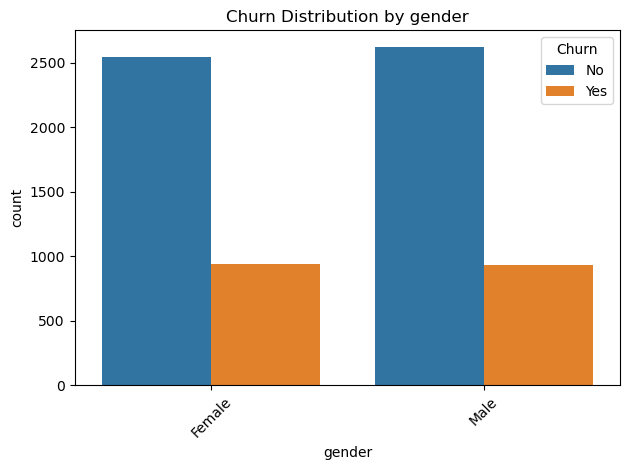

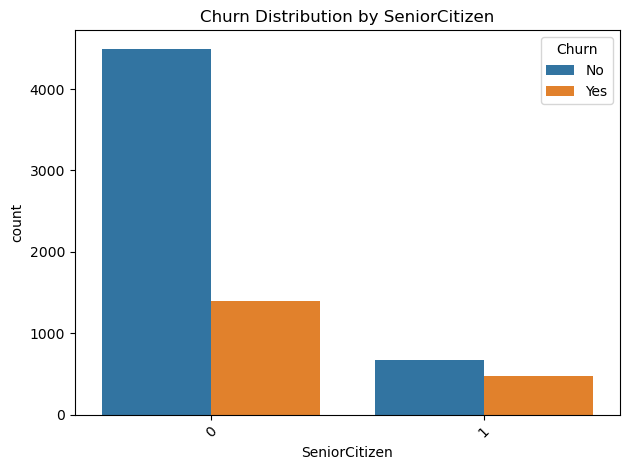

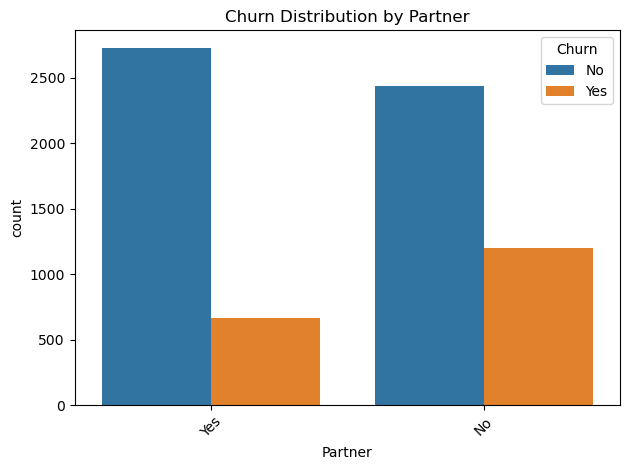

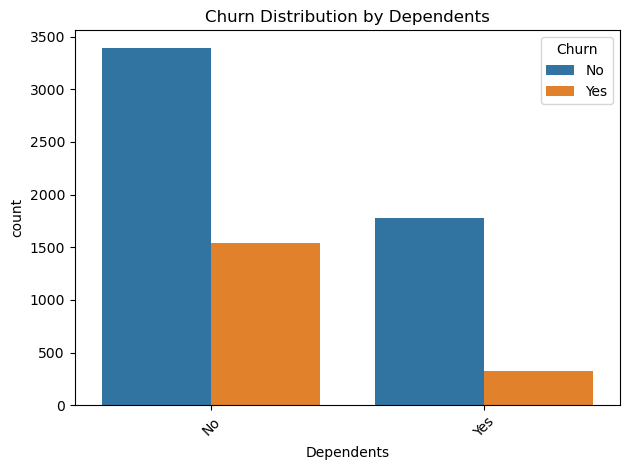

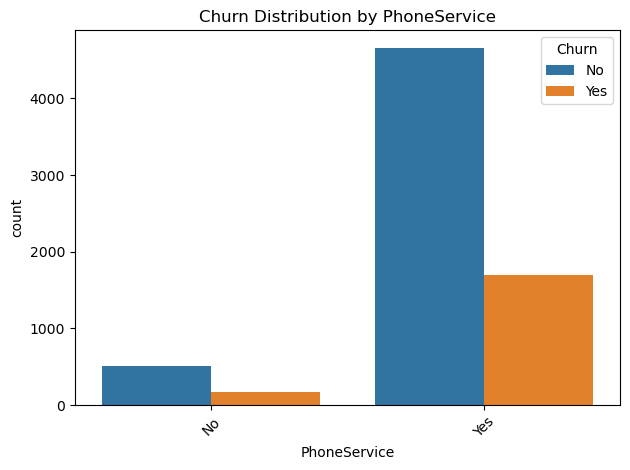

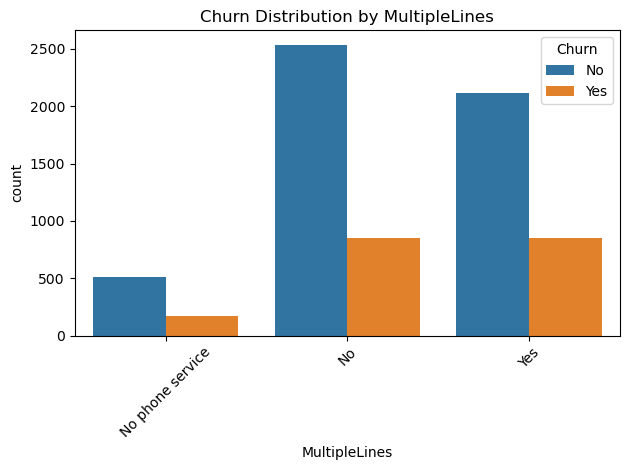

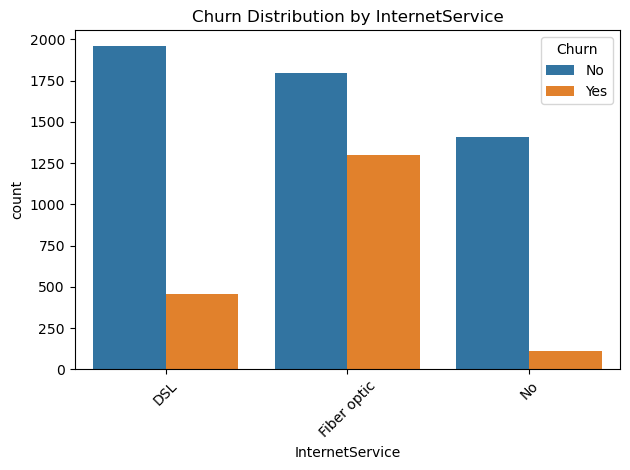

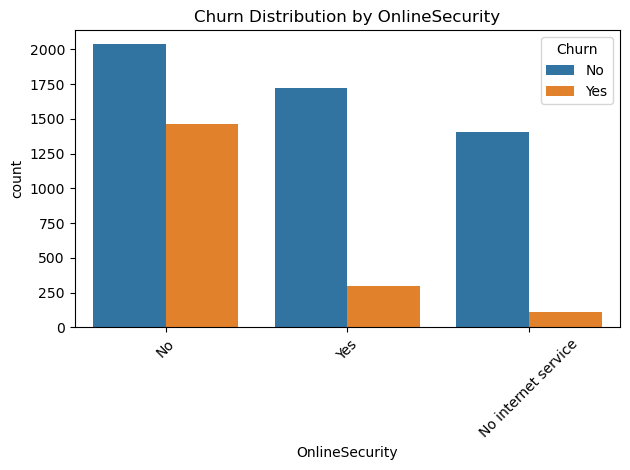

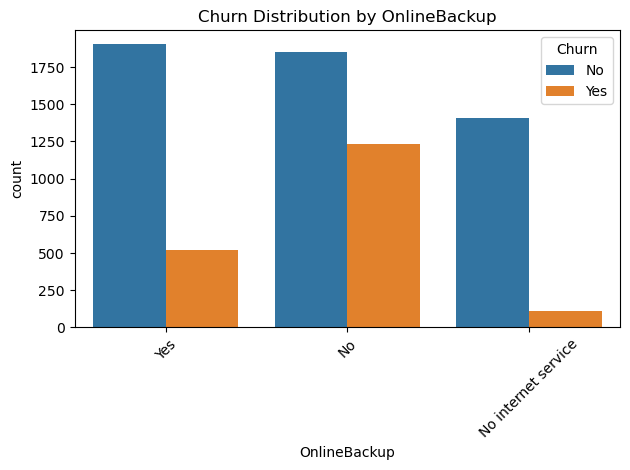

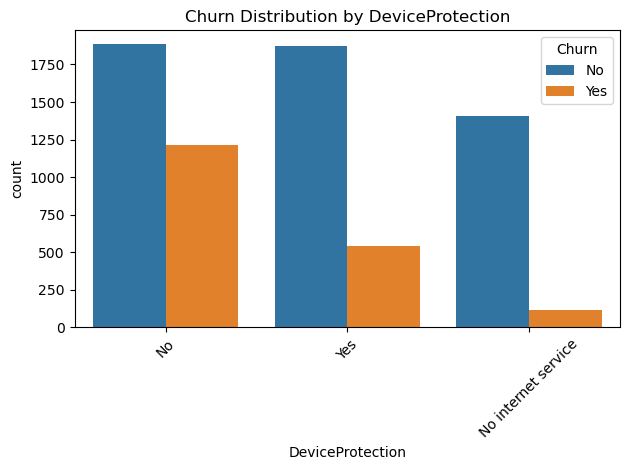

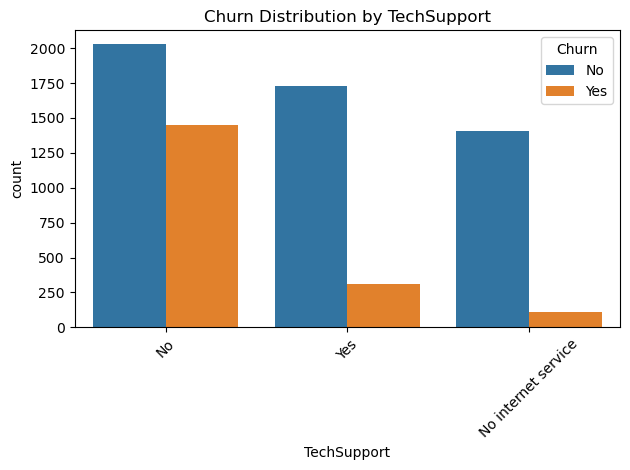

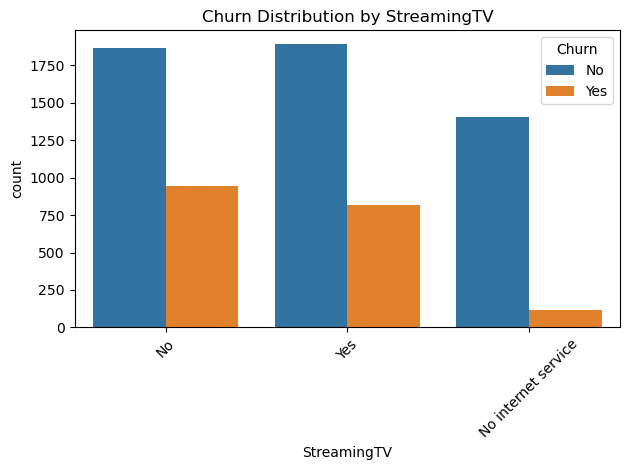

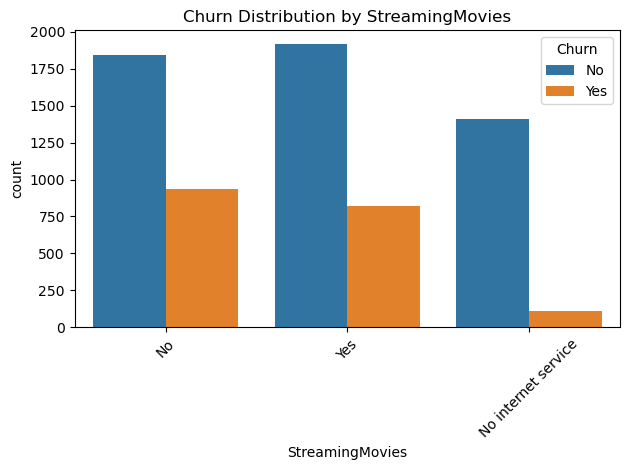

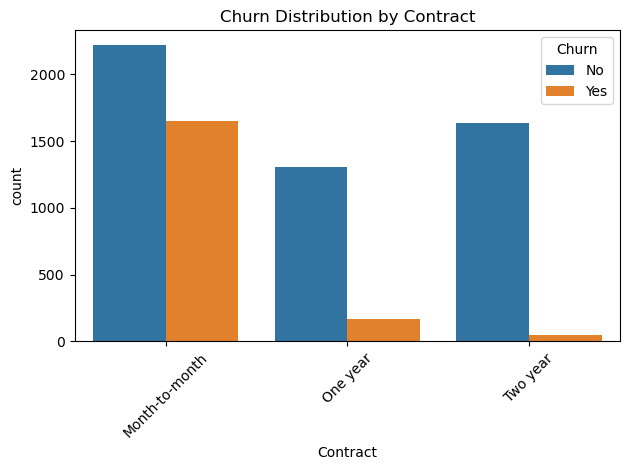

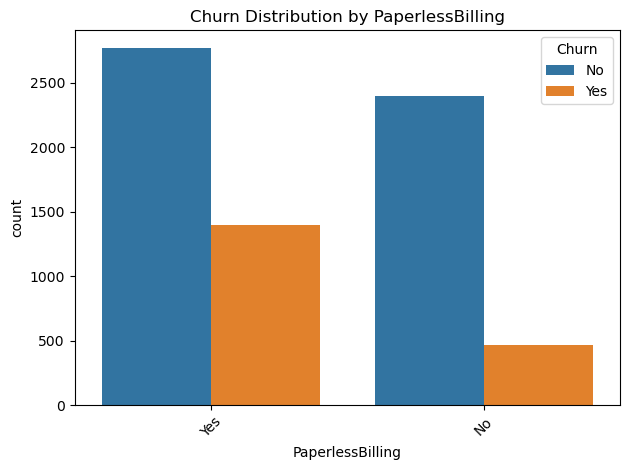

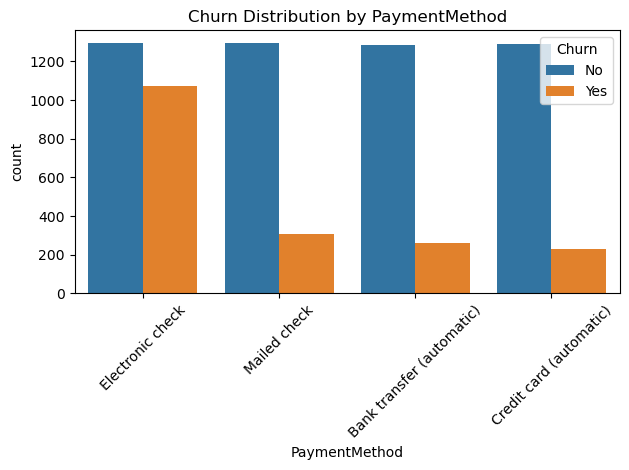

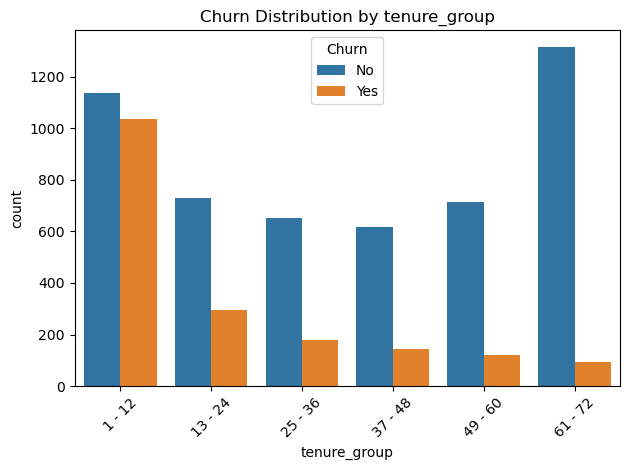

In [23]:
for i, predictor in enumerate(df.drop(columns=["Churn", "TotalCharges", "MonthlyCharges"])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue="Churn")
    plt.title(f"Churn Distribution by {predictor}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()
    plt.close()

#### Key Observations

Gender: Churn rates are similar for males and females, so gender doesn’t seem to play a big role in whether customers leave.

Senior Citizens: Older customers churn more often than younger ones, suggesting age might influence customer retention.

Partner and Dependents: Single customers without partners or dependents are more likely to leave, indicating they may need different retention strategies.

Phone Service and Multiple Lines: Having phone service doesn’t impact churn much, but customers without multiple lines churn slightly more.

Internet Service: Customers using DSL or fiber optic internet are more likely to churn, especially fiber optic users. This could be due to pricing or service quality concerns.

Add-On Services: Customers without online security, backup, device protection, or tech support churn much more often. Bundling these services might keep them engaged.

Streaming Services: Customers with streaming TV or movies are less likely to churn, showing that entertainment options add value and loyalty.

Payment Method: Electronic check users have the highest churn rates, while automated payments like credit cards or bank transfers see fewer people leaving.

Contracts: Month-to-month customers are far more likely to churn compared to those with 1- or 2-year contracts. Offering incentives for longer contracts could help.

Paperless Billing: Customers on paperless billing churn more, which could reflect frustration with digital-only interactions.

Tenure: Newer customers (1-12 months) churn the most, while longer-tenure customers tend to stay. Focusing on a great early experience is crucial.

# Key Findings